<a href="https://colab.research.google.com/github/tunaegilmez/Badi_BE/blob/main/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [341]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from numpy.fft import fft2, ifft2, fftshift, ifftshift


In [342]:
image=cv2.imread('tf2_engineer.jpg')

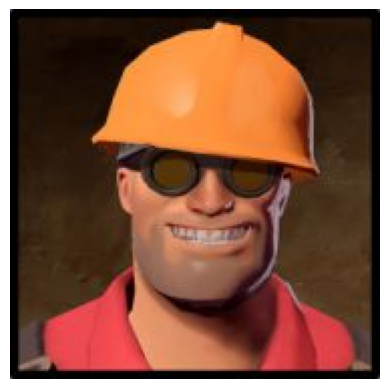

In [343]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [344]:
height, width = image.shape[:2]

print(f"Image height: {height}")
print(f"Image width: {width}")

Image height: 184
Image width: 184


In [345]:
x=height//2
y=width//2

print(f"x: {x}")
print(f"y: {y}")

x: 92
y: 92


In [346]:
intensity=image[x,y]
print(intensity)

[ 67  92 172]


In [347]:
patch_hight=30
patch_width=40

In [348]:
top_left_x = x - patch_width // 2
top_left_y = y - patch_hight // 2
bottom_right_x = x + patch_width // 2
bottom_right_y = y + patch_hight // 2

In [349]:
bgr=(168,158,50)

In [350]:
image[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = bgr


In [351]:
rectangle_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)



In [352]:
intensity=rectangle_image[x,y]
print(intensity)

[ 50 158 168]


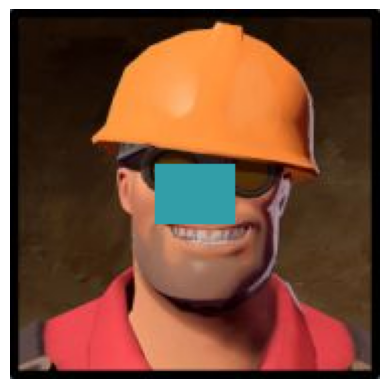

In [353]:
plt.imshow(rectangle_image)
plt.axis("off")
plt.show()

In [354]:
einstein=cv2.imread('/content/einstein.tif',cv2.IMREAD_GRAYSCALE)

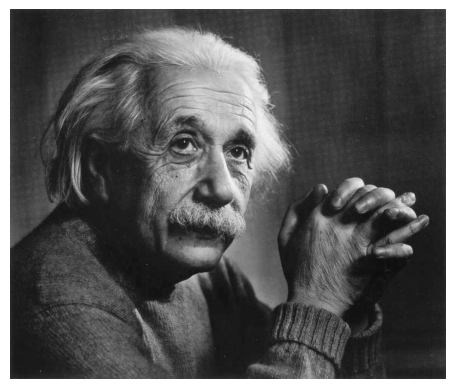

In [355]:
plt.imshow(einstein,cmap='gray')
plt.axis("off")
plt.show()

In [356]:
nagative_einstein=255-einstein

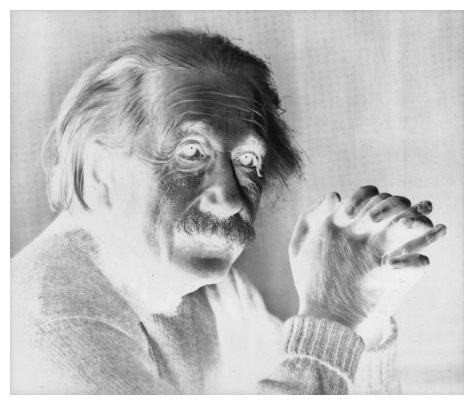

In [357]:
plt.figure(figsize=(10,5))
plt.imshow(nagative_einstein,cmap='gray')
plt.axis("off")
plt.show()

In [358]:
height, width = einstein.shape
print(f"Image height: {height}")
print(f"Image width: {width}")

Image height: 679
Image width: 800


In [359]:
np.random.seed(42)
pixels = [(np.random.randint(0, width), np.random.randint(0, height)) for _ in range(5)]

print(pixels)

[(102, 435), (270, 106), (71, 20), (614, 121), (466, 214)]


In [360]:
print("\nPixel Intensity Values:\n")
for i, (x, y) in enumerate(pixels, 1):
    original = einstein[y, x]
    negative = nagative_einstein[y, x]
    print(f"Pixel {i}: Original={original}, Negative={negative}")


Pixel Intensity Values:

Pixel 1: Original=109, Negative=146
Pixel 2: Original=112, Negative=143
Pixel 3: Original=106, Negative=149
Pixel 4: Original=105, Negative=150
Pixel 5: Original=160, Negative=95


In [361]:
pout=cv2.imread('/content/pout.tif',cv2.IMREAD_GRAYSCALE)

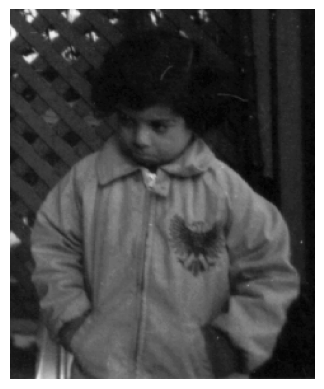

In [362]:
plt.imshow(pout,cmap='gray')
plt.axis("off")
plt.show()

In [363]:
x,y=50,100

intensity=pout[x,y]
print(intensity)

87


In [364]:
pout_float = pout.astype(np.float32)  # float'a çevir
c = 255 / np.log(1 + np.max(pout_float))  # ölçek sabiti
log_transformed = c * np.log(1 + pout_float)

In [365]:
log_transformed = np.uint8(log_transformed)


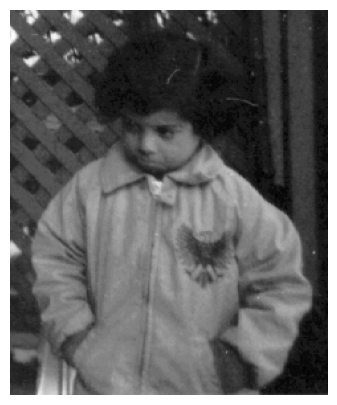

In [366]:
plt.figure(figsize=(10, 5))
plt.imshow(log_transformed, cmap='gray')
plt.axis("off")
plt.show()

In [367]:
x,y=50,100

intensity=log_transformed[x,y]
print(intensity)

210


In [368]:
pout_norm = pout_float / 255.0

In [369]:
c = 255.0

In [370]:
inverse_log = c * (np.exp(pout_norm) - 1)

In [371]:
inverse_log = np.clip(inverse_log, 0, 255)
inverse_log = np.uint8(inverse_log)

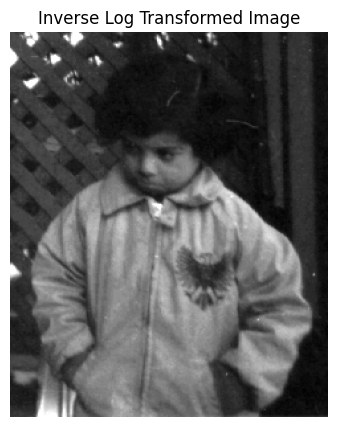

In [372]:
plt.figure(figsize=(10, 5))
plt.imshow(inverse_log, cmap='gray')
plt.axis("off")
plt.title("Inverse Log Transformed Image")
plt.show()

In [373]:
x,y=50,100

intensity=inverse_log[x,y]
print(intensity)

103


In [374]:
# inverse log or log transform

In [375]:
log_back_float = log_transformed / c
inverse_log = np.exp(log_back_float) - 1
inverse_log_uint8 = np.uint8(np.clip(inverse_log, 0, 255))

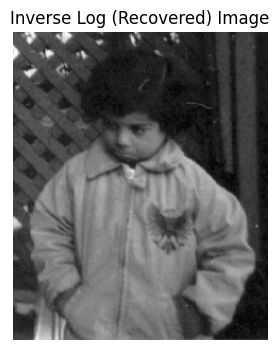

In [376]:
plt.figure(figsize=(6, 4))
plt.imshow(log_transformed, cmap='gray')
plt.title("Inverse Log (Recovered) Image")
plt.axis("off")
plt.show()


In [377]:
x,y=50,100

intensity=log_transformed[x,y]
print(intensity)

210


In [378]:
#comment for step 2 and step 4.
"""
for first log tranformed picture and after we did inverse log tranform  there should be no difference between original image when ı think like no logic but when ı checked the pixels intensity
 the numbers are sayin this 2 images are not same.Maybe we need to see histogram to see differances pixel intensity betwenn all image.
"""

'\nfor first log tranformed picture and after we did inverse log tranform  there should be no difference between original image when ı think like no logic but when ı checked the pixels intensity \n the numbers are sayin this 2 images are not same.Maybe we need to see histogram to see differances pixel intensity betwenn all image.\n'

In [379]:
moon=cv2.imread('/content/moon.tif',cv2.IMREAD_GRAYSCALE)

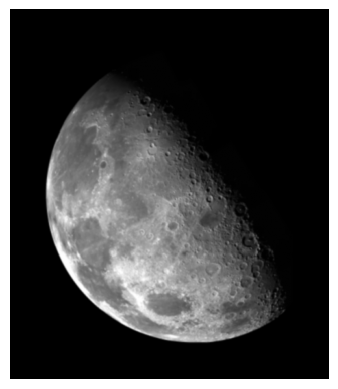

In [380]:
plt.imshow(moon,cmap='gray')
plt.axis("off")
plt.show()

In [381]:
sigma = 2  # Standard deviation for Gaussian blur
blurred = cv2.GaussianBlur(moon, (5, 5), sigma)

In [382]:
mask = moon.astype(float) - blurred.astype(float)


In [383]:
k_values = [0.5, 1.0, 2.0]
sharpened_images = []

In [384]:
for k in k_values:
    # Apply the formula: g(x,y) = f(x,y) + k * mask(x,y)
    sharpened = moon.astype(float) + k * mask
    # Clip the values to [0, 255] and convert back to uint8
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    sharpened_images.append(sharpened)

In [385]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

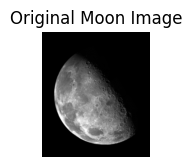

In [386]:
plt.subplot(1, 4, 1)
plt.title("Original Moon Image")
plt.imshow(moon, cmap='gray')
plt.axis('off')

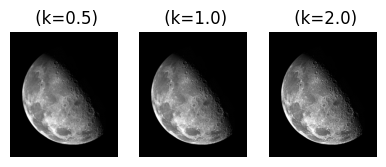

In [387]:
for i, (k, sharpened) in enumerate(zip(k_values, sharpened_images), 1):
    plt.subplot(1, 4, i+1)
    plt.title(f" (k={k})")
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')


In [388]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [389]:
padded = np.pad(moon, ((0, moon.shape[0]), (0, moon.shape[1])), mode='constant')
rows, cols = padded.shape
crow, ccol = rows // 2, cols // 2

In [390]:
F = fft2(padded)
F_shifted = fftshift(F)

In [391]:
D0 = 30  # Arbitrary cut-off frequency, adjust based on trial
n = 2    # Filter order
u = np.arange(cols) - ccol
v = np.arange(rows) - crow
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)
H_hp = 1 / (1 + (D0 / D)**(2*n))  # Butterworth high-pass filter
H_hp[D == 0] = 0

<ipython-input-391-515164468>:7: RuntimeWarning: divide by zero encountered in divide
  H_hp = 1 / (1 + (D0 / D)**(2*n))  # Butterworth high-pass filter


In [392]:
k_values = [0.5, 1.0, 2.0]  # Same k values as spatial domain
frequency_sharpened_images = []

In [393]:
for k in k_values:
    # Apply the formulation: g(x,y) = F^-1[(1 + k * H_hp) * F]
    H_modified = 1 + k * H_hp
    G_shifted = F_shifted * H_modified
    G = ifftshift(G_shifted)
    g = ifft2(G)
    # Take the real part and crop back to original size
    g = np.abs(g[:moon.shape[0], :moon.shape[1]])
    g = np.clip(g, 0, 255).astype(np.uint8)
    frequency_sharpened_images.append(g)

In [394]:
sigma = 2
blurred = cv2.GaussianBlur(moon, (5, 5), sigma)
mask = moon.astype(float) - blurred.astype(float)
spatial_sharpened_images = []
for k in k_values:
    sharpened = moon.astype(float) + k * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    spatial_sharpened_images.append(sharpened)

In [395]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

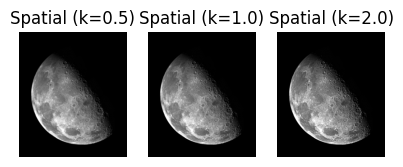

In [396]:
for i, (k, sharpened) in enumerate(zip(k_values, spatial_sharpened_images), 1):
    plt.subplot(2, 4, i+1)
    plt.title(f"Spatial (k={k})")
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')

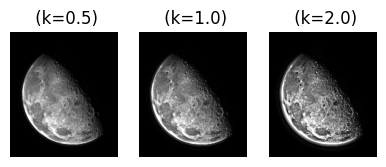

In [397]:
for i, (k, sharpened) in enumerate(zip(k_values, frequency_sharpened_images), 5):
    plt.subplot(2, 4, i+1)
    plt.title(f" (k={k})")
    plt.imshow(sharpened, cmap='gray')
    plt.axis('off')

In [398]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [399]:
pcb=cv2.imread('/content/pcb.tif',cv2.IMREAD_GRAYSCALE)

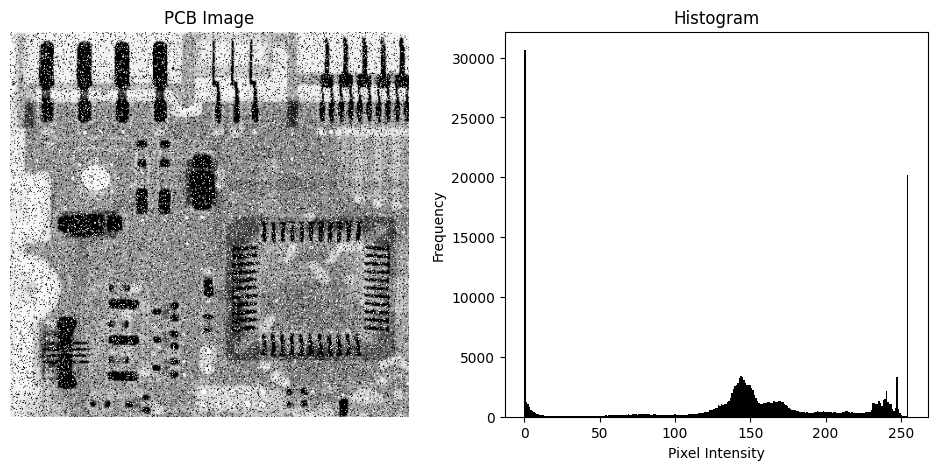

In [400]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.imshow(pcb, cmap='gray')
plt.title("PCB Image")
plt.axis("off")

# Histogram hesapla ve göster
plt.subplot(1, 2, 2)
plt.hist(pcb.ravel(), bins=256, range=(0,255), color='black')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.show()

In [401]:
# salt and pepper type of noise.to fix that ı will use median filtering.

In [402]:
filtered_pcb = cv2.medianBlur(pcb, 3)
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(np.float64(-0.5), np.float64(454.5), np.float64(439.5), np.float64(-0.5))

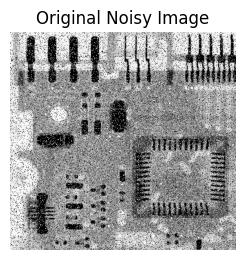

In [403]:
plt.subplot(1,2,1)
plt.imshow(pcb, cmap='gray')
plt.title("Original Noisy Image")
plt.axis("off")

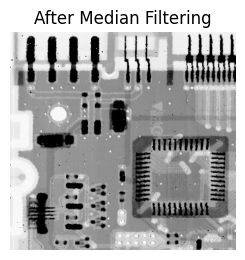

In [404]:
plt.subplot(1,2,2)
plt.imshow(filtered_pcb, cmap='gray')
plt.title("After Median Filtering")
plt.axis("off")

plt.show()

In [405]:
pollen=cv2.imread('/content/pollen.tif',cv2.IMREAD_GRAYSCALE)

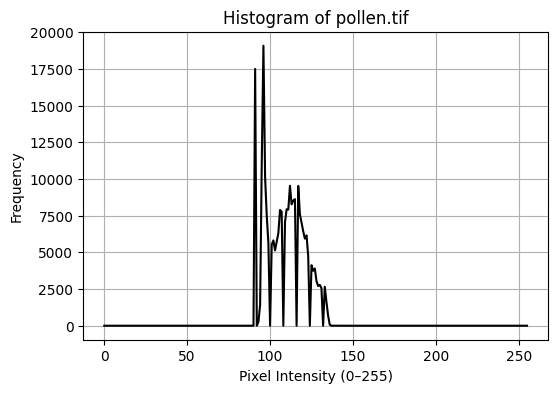

In [406]:
hist = cv2.calcHist([pollen], [0], None, [256], [0,256])

# Histogramı çiz
plt.figure(figsize=(6,4))
plt.plot(hist, color='black')
plt.title("Histogram of pollen.tif")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [407]:

#when we looked to the histogram we see that pixel intensity between 70 and 130.This statistic says us this image is low contrast image.
#To fix that i ll use histogram equalization.

In [408]:
equalized = cv2.equalizeHist(pollen)

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

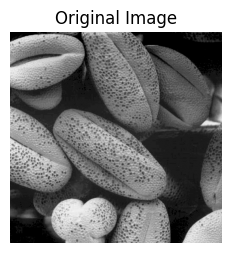

In [409]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.imshow(pollen, cmap='gray')
plt.title("Original Image")
plt.axis("off")

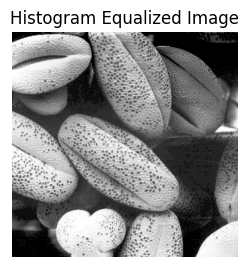

In [410]:
plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

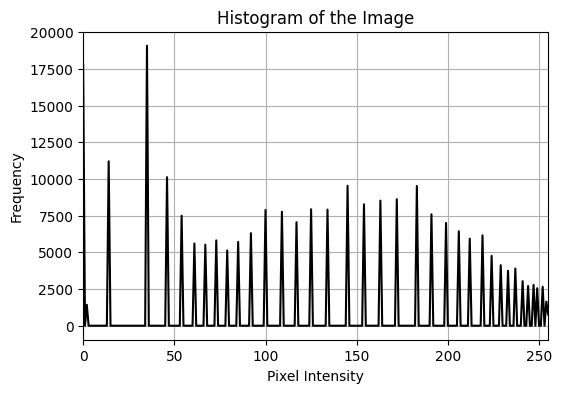

In [411]:
hist = cv2.calcHist([equalized], [0], None, [256], [0, 256])
plt.figure(figsize=(6, 4))
plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.grid(True)
plt.xlim([0, 255])
plt.show()

In [412]:
#after we used histogram equalization we see that contrast is higher right now and when we look histogram of image we see that now pixels are between 0 and 255 that shows us
# contrast is normal right now and this is the proof for that.

In [413]:
#also for other soliton  ı ll use gaussian filtering system to make image more softer and making noise is less than the original version after ı did gaussian filter
# ı ll put statistical proof to see if gaussian filtered is worked or not.

In [414]:
gaussian_filtered = cv2.GaussianBlur(pollen, (5, 5), 1)

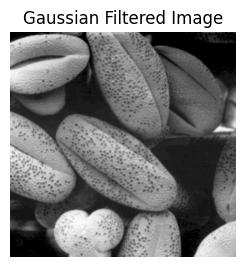

In [415]:
plt.subplot(1, 2, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')
plt.show()

In [416]:
original_mad = np.mean(np.abs(pollen - np.mean(image)))
filtered_mad = np.mean(np.abs(gaussian_filtered - np.mean(gaussian_filtered)))
print(f"Original Image Mean Absolute Difference: {original_mad:.2f}")
print(f"Gaussian Filtered Image Mean Absolute Difference: {filtered_mad:.2f}")

Original Image Mean Absolute Difference: 35.56
Gaussian Filtered Image Mean Absolute Difference: 9.52


In [417]:
# after we applied goussian filter numbers are saying we did correctly.